<a href="https://colab.research.google.com/github/ShibuGitB/CodSoft/blob/main/Task_3_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Necessary Packages***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***Dataset***

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Task 3 CodSoft/Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


***Count of employees from each Geographys***

<Axes: xlabel='Geography', ylabel='count'>

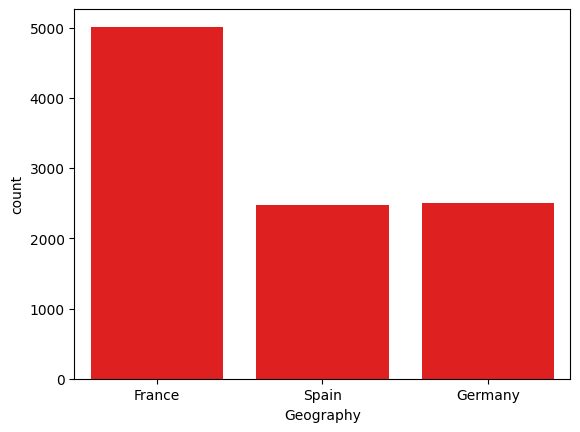

In [ ]:
sns.countplot(x="Geography",data=dataset,color="r")

***Count of Male & Female employees in the Company***

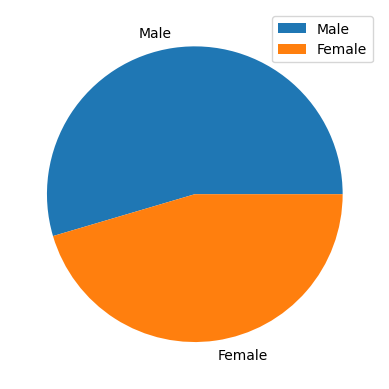

In [ ]:
x=[5457,4543]
y=["Male","Female"]

plt.pie(x=x,labels=y)
plt.legend()

***Top 5 Age of the employees in the company***

<BarContainer object of 5 artists>

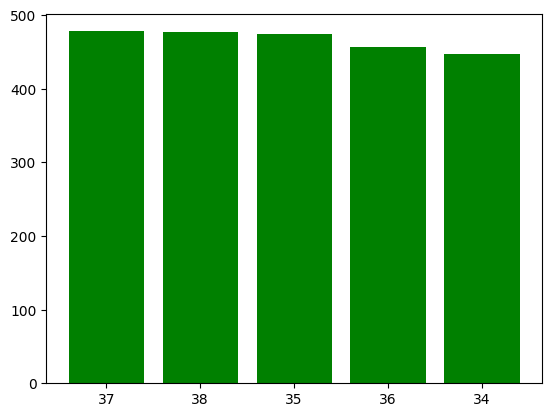

In [ ]:
x=["37","38","35","36","34"]
y=[478,477,474,456,447]

plt.bar(x,y,color="g")

***Converting String values to Numerical***

In [ ]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
encoder=LabelEncoder()

columns=["Surname","Geography","Gender"]

for i in columns :

  encoder.fit(dataset[i])
  dataset[i]=encoder.transform(dataset[i])

In [ ]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

***Droping Unwanted Columns***

In [ ]:
columns2=["RowNumber","CustomerId","Surname"]

for i in columns2 :

  dataset.drop([i],axis=1,inplace=True)

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


***Checking is there any missing values or not***

In [ ]:
dataset.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***Seperating input & output***

In [ ]:
input=dataset.iloc[:,0:10]
output=dataset.iloc[:,10]

***Scaling Input***

In [ ]:
scaler=MinMaxScaler()
scaler.fit(input)
input=scaler.transform(input)

***Taking input & output for training & testing***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.3,random_state=1)

***Applying all algorithms and making models & checking their accuracys***

In [ ]:
model1=KNeighborsClassifier(n_neighbors=7)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred1))

0.8063333333333333


In [ ]:
model2=SVC(kernel="linear")
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred2))

0.791


In [ ]:
model3=DecisionTreeClassifier(criterion="entropy")
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred3))

0.803


In [ ]:
model4=GaussianNB()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred4))

0.827


In [ ]:
model6=AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred6))

0.8576666666666667


In [ ]:
model7=XGBClassifier()
model7.fit(x_train,y_train)
y_pred7=model7.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred7))

0.856


***Takes a model from Random Forest Classifier algorithm with a better accuracy at almost 86 %***

In [ ]:
model5=RandomForestClassifier(n_estimators=200,criterion="entropy")
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred5))

0.8626666666666667


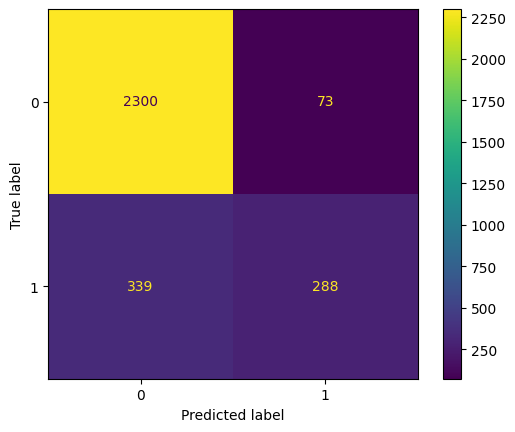

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

In [ ]:
print (classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



***Made a prediction from a sample input***

In [ ]:
prediction=model5.predict(scaler.transform([[619,0,0,42,2,0.00,1,1,1,101348.88]]))

if prediction==1 :

  print ("The customer will leave the bank")
else :

  print ("The customer will not leave the bank")

The customer will leave the bank
